# Amazon Hiring

This model is constructed using loop system . The loop follows as -
1. Got predictions of fitmentpercent by dropping biasinfulencerfactor column. ("Fitment preds.csv")
2. Got predictions of biasinfluencerfactor by dropping fitmentpercent column. ("Bias preds.csv")
3. Use the predictions of 1st step in predicting biasinfulencerfactor. ("Bias preds 1.csv")
4. Use the predictions of 3nd step in predicting fitmentpercent. ("Fitment preds 1.csv")\
5. Combine both results into single submission file. ("Amazon_hiring_2.csv")

Before starting to implement this notebook , its adviced to seperate 2 notebooks merged in this single notebook . Thus reduce the the difficulty of understanding the notebook / Code.

### Feel free to Contact me if found difficulty in understanding the code.

## Importing required libraries

In [113]:
import numpy as np                   # For creating matrices and for number operations
import pandas as pd                  # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns                # To plot heatmaps
sns.set_style("darkgrid")            
import warnings                      # Hide warnings
warnings.filterwarnings('ignore')
# %load_ext jupyternotify

In [114]:
#Loading Train Data

df = pd.read_csv("Data/Primary/Amazon Hiring/Train.csv")
df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [115]:
# Getting info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [116]:
# Checking for null values

df.isna().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

<AxesSubplot:>

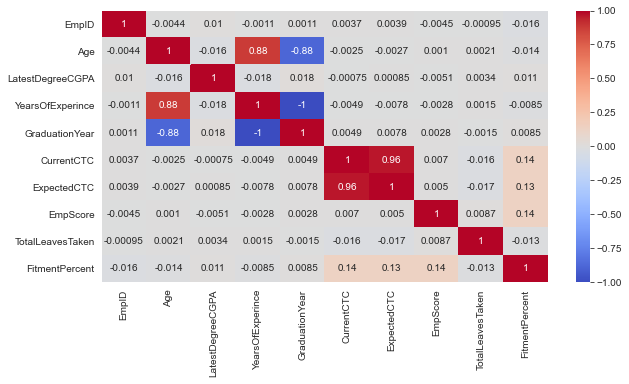

In [117]:
# Plotting correlation heatmap

plt.figure(figsize = (10 , 5))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [118]:
# Dropping one of the two highy correlated columns

df.drop(["GraduationYear"] , axis = 1 , inplace = True)

<AxesSubplot:>

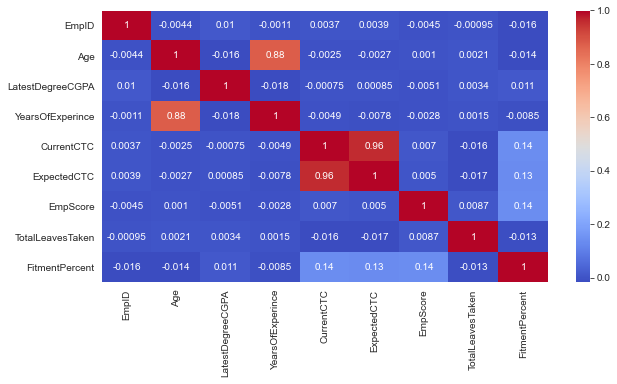

In [119]:
plt.figure(figsize = (10 , 5))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [120]:
test = pd.read_csv("Data/Primary/Amazon Hiring/Test.csv")    # Loading test dataset
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpID                    8745 non-null   int64 
 1   EmpName                  8745 non-null   object
 2   LanguageOfCommunication  8745 non-null   object
 3   Age                      8745 non-null   int64 
 4   Gender                   8745 non-null   object
 5   JobProfileIDApplyingFor  8745 non-null   object
 6   HighestDegree            8745 non-null   object
 7   DegreeBranch             8745 non-null   object
 8   GraduatingInstitute      8745 non-null   object
 9   LatestDegreeCGPA         8745 non-null   int64 
 10  YearsOfExperince         8745 non-null   int64 
 11  GraduationYear           8745 non-null   int64 
 12  CurrentCTC               8745 non-null   int64 
 13  ExpectedCTC              8745 non-null   int64 
 14  MartialStatus            8745 non-null  

In [122]:
test.isna().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
dtype: int64

In [123]:
test.drop(["GraduationYear"] , axis = 1 , inplace = True)

In [124]:
# Dropping null values across the rows in Biasinfluencerfactor column

df.dropna(subset = ["BiasInfluentialFactor"] , inplace = True)

## EDA Tools

In [125]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in EmpID column is/are 10309


The unique values in EmpID column is/are [11041 18638  3941 ...  6659  5986  4668]


The value counts for each value in EmpID column is/are :  
18433    1
2732     1
15050    1
19148    1
6862     1
        ..
9606     1
21896    1
23945    1
3467     1
12282    1
Name: EmpID, Length: 10309, dtype: int64



****************************************************************************************************



The number of unique values in EmpName column is/are 1673


The unique values in EmpName column is/are ['John' 'James' 'Charles' ... 'Ebert' 'Encarnacion' 'Gale']


The value counts for each value in EmpName column is/are :  
Jessie     14
Abraham    14
Charlie    14
Cicero     14
Virgil     14
           ..
Buell       1
Garret      1
Wiliam      1
Hunt        1
Ewin        1
Name: EmpName, Length: 1673, dtype: int64



****************************************************************************************************




The value counts for each value in FitmentPercent column is/are :  
91.59    13
91.20    13
91.04    12
85.75    12
71.80    11
         ..
51.75     1
81.75     1
51.73     1
78.65     1
65.01     1
Name: FitmentPercent, Length: 3134, dtype: int64



****************************************************************************************************





Loading biasinfulencerfactor column from another notebook where the predictions are made

In [129]:
biases = pd.read_csv("Bias Preds 1.csv")
biases = biases["Bias"]
test["BiasInfluentialFactor"] = biases

In [130]:
df.drop(["EmpID" , "EmpName"] , axis = 1 , inplace = True)
ids = test["EmpID"]
test.drop(["EmpID" , "EmpName"] , axis = 1 , inplace = True)

In [131]:
cats = df.select_dtypes(include="object").columns.to_list()
cats

['LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany',
 'BiasInfluentialFactor']

In [132]:
ints = df.select_dtypes(exclude="object").columns.to_list()
ints.pop()

'FitmentPercent'

## Data Preprocessing

In [133]:
# Removing skewness

for i in ints:
    df[i] = np.log(df[i] + 1)
    test[i] = np.log(test[i] + 1)

In [134]:
df.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,3.583519,Male,JR85289,B.Tech,Electrical,Tier 1,2.079442,2.564949,3.091042,3.295837,Married,1.791759,SSE,Enterprise,Design,3.044522,YearsOfExperince,95.40
2,English,3.610918,Female,JR87525,PhD,Computer Science,Tier 1,1.945910,1.945910,2.772589,3.218876,Single,1.791759,SDE,MidSized,Engineering,2.995732,Gender,91.26
3,English,3.401197,Female,JR87525,BCA,Information Technology,Tier 2,1.791759,1.945910,2.833213,3.218876,Married,1.791759,SDE,Startup,Product,2.833213,Gender,72.29
4,English,3.258097,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,2.197225,1.098612,3.218876,3.496508,Married,1.791759,SDE,Enterprise,Engineering,2.397895,DegreeBranch,86.34
5,Native,3.583519,Male,JR88879,BCA,Computer Science,Tier 2,2.302585,2.564949,3.258097,3.401197,Married,1.609438,DS,MidSized,Engineering,2.397895,YearsOfExperince,93.23


In [135]:
test.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,Native,3.583519,Male,JR85289,PhD,Information Technology,Tier 2,1.791759,1.791759,3.332205,3.555348,Single,1.609438,SDE,Enterprise,Finance,2.944439,DegreeBranch
1,English,3.583519,Male,JR85289,B.Tech,Information Technology,Tier 3,2.302585,2.564949,3.401197,3.526361,Married,1.609438,EM,Enterprise,Engineering,2.197225,DegreeBranch
2,English,3.367296,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,2.302585,1.098612,2.944439,3.258097,Married,1.386294,SDE,Startup,Engineering,2.944439,MartialStatus
3,Hindi,3.637586,Male,JR87525,MS,Computer Science,Tier 2,2.197225,2.484907,2.079442,2.564949,Single,1.791759,DS,Enterprise,Product,2.890372,CurrentCompanyType
4,Hindi,3.610918,Female,JR85289,PhD,Artificial Intelligence,Tier 2,2.079442,1.945910,3.135494,3.496508,Married,1.609438,SDE,Startup,Engineering,2.302585,Gender


In [137]:
assert len(cats) == 11

In [138]:
df = pd.get_dummies(df , columns = cats , prefix = cats , drop_first = True)
test = pd.get_dummies(test , columns = cats , prefix = cats , drop_first = True)

In [139]:
df.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,DepartmentInCompany_Finance,DepartmentInCompany_Product,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,3.583519,2.079442,2.564949,3.091042,3.295837,1.791759,3.044522,95.40,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.610918,1.945910,1.945910,2.772589,3.218876,1.791759,2.995732,91.26,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.401197,1.791759,1.945910,2.833213,3.218876,1.791759,2.833213,72.29,0,0,...,0,1,0,0,0,1,0,0,0,0
4,3.258097,2.197225,1.098612,3.218876,3.496508,1.791759,2.397895,86.34,0,0,...,0,0,1,0,0,0,0,0,0,0
5,3.583519,2.302585,2.564949,3.258097,3.401197,1.609438,2.397895,93.23,0,1,...,0,0,0,0,0,0,0,0,0,1


In [140]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,...,DepartmentInCompany_Finance,DepartmentInCompany_Product,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,3.583519,1.791759,1.791759,3.332205,3.555348,1.609438,2.944439,0,1,1,...,1,0,1,0,0,0,0,0,0,0
1,3.583519,2.302585,2.564949,3.401197,3.526361,1.609438,2.197225,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3.367296,2.302585,1.098612,2.944439,3.258097,1.386294,2.944439,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3.637586,2.197225,2.484907,2.079442,2.564949,1.791759,2.890372,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,3.610918,2.079442,1.945910,3.135494,3.496508,1.609438,2.302585,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10309 entries, 0 to 13644
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      10309 non-null  float64
 1   LatestDegreeCGPA                         10309 non-null  float64
 2   YearsOfExperince                         10309 non-null  float64
 3   CurrentCTC                               10309 non-null  float64
 4   ExpectedCTC                              10309 non-null  float64
 5   EmpScore                                 10309 non-null  float64
 6   TotalLeavesTaken                         10309 non-null  float64
 7   FitmentPercent                           10309 non-null  float64
 8   LanguageOfCommunication_Hindi            10309 non-null  uint8  
 9   LanguageOfCommunication_Native           10309 non-null  uint8  
 10  Gender_Male                              10309

In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      8745 non-null   float64
 1   LatestDegreeCGPA                         8745 non-null   float64
 2   YearsOfExperince                         8745 non-null   float64
 3   CurrentCTC                               8745 non-null   float64
 4   ExpectedCTC                              8745 non-null   float64
 5   EmpScore                                 8745 non-null   float64
 6   TotalLeavesTaken                         8745 non-null   float64
 7   LanguageOfCommunication_Hindi            8745 non-null   uint8  
 8   LanguageOfCommunication_Native           8745 non-null   uint8  
 9   Gender_Male                              8745 non-null   uint8  
 10  Gender_Other                             8745 no

In [143]:
for i in df.columns:
    if i not in test.columns:
        print(i)

FitmentPercent


In [144]:
for i in test.columns:
    if i not in df.columns:
        print(i)

## Train Test Split

In [145]:
from sklearn.model_selection import train_test_split
X = df.drop(["FitmentPercent"] , axis = 1)
y = df["FitmentPercent"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8247, 2062, 8247, 2062)

In [146]:
ints

['Age',
 'LatestDegreeCGPA',
 'YearsOfExperince',
 'CurrentCTC',
 'ExpectedCTC',
 'EmpScore',
 'TotalLeavesTaken']

In [148]:
X_train.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,...,DepartmentInCompany_Finance,DepartmentInCompany_Product,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
10883,3.583519,2.079442,2.302585,2.484907,2.772589,1.609438,2.397895,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1691,3.295837,2.079442,1.386294,2.302585,2.890372,1.791759,2.079442,0,0,1,...,0,0,0,1,0,0,0,0,0,0
11427,3.258097,2.079442,1.098612,3.258097,3.555348,1.098612,2.995732,1,0,1,...,0,0,1,0,0,0,0,0,0,0
771,3.496508,2.079442,1.098612,1.945910,2.564949,1.386294,3.044522,0,1,0,...,0,0,0,0,0,1,0,0,0,0
297,3.258097,1.609438,1.098612,2.995732,3.258097,1.098612,1.609438,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [149]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,...,DepartmentInCompany_Finance,DepartmentInCompany_Product,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,3.583519,1.791759,1.791759,3.332205,3.555348,1.609438,2.944439,0,1,1,...,1,0,1,0,0,0,0,0,0,0
1,3.583519,2.302585,2.564949,3.401197,3.526361,1.609438,2.197225,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3.367296,2.302585,1.098612,2.944439,3.258097,1.386294,2.944439,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3.637586,2.197225,2.484907,2.079442,2.564949,1.791759,2.890372,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,3.610918,2.079442,1.945910,3.135494,3.496508,1.609438,2.302585,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train[ints] = scaler1.fit_transform(X_train[ints])
X_test[ints] = scaler1.transform(X_test[ints])
test[ints] = scaler1.transform(test[ints])

In [151]:
X_train.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,...,DepartmentInCompany_Finance,DepartmentInCompany_Product,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
10883,1.101949,-0.021633,0.746480,-0.922216,-1.465832,0.522811,-0.201719,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1691,-1.234287,-0.021633,-0.902315,-1.348752,-1.084053,1.235160,-0.954541,0,0,1,...,0,0,0,1,0,0,0,0,0,0
11427,-1.540772,-0.021633,-1.419977,0.886638,1.071380,-1.473038,1.211561,1,0,1,...,0,0,1,0,0,0,0,0,0,0
771,0.395339,-0.021633,-1.419977,-2.183183,-2.138867,-0.349034,1.326900,0,1,0,...,0,0,0,0,0,1,0,0,0,0
297,-1.540772,-2.609680,-1.419977,0.272845,0.107878,-1.473038,-2.065624,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,...,DepartmentInCompany_Finance,DepartmentInCompany_Product,BiasInfluentialFactor_DegreeBranch,BiasInfluentialFactor_EmpScore,BiasInfluentialFactor_Ethinicity,BiasInfluentialFactor_Gender,BiasInfluentialFactor_HighestDegree,BiasInfluentialFactor_LatestDegreeCGPA,BiasInfluentialFactor_MartialStatus,BiasInfluentialFactor_YearsOfExperince
0,1.101949,-1.605738,-0.172712,1.060012,1.071380,0.522811,1.090304,0,1,1,...,1,0,1,0,0,0,0,0,0,0
1,1.101949,1.207093,1.218584,1.221419,0.977421,0.522811,-0.676103,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,-0.653976,1.207093,-1.419977,0.152846,0.107878,-0.349034,1.090304,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1.541023,0.626932,1.074553,-1.870790,-2.138867,1.235160,0.962490,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.324453,-0.021633,0.104671,0.599814,0.880656,0.522811,-0.427032,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Model fitting and Evaluation

In [153]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error
from sklearn.model_selection import cross_val_score

In [154]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(['AdaBoostRegressor', AdaBoostRegressor(random_state = 42)])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
models.append(['Linear Regression', LinearRegression()])
models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [155]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test)
    mae = mean_absolute_error(preds , y_test)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Mean Squared Error : {mse:.4f}")
    print("\n")

    print(f"Mean Squared Log Error : {log:.4f}")
    print("\n")
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
    sam.append(log)
    
    return sam , mod



XGBRegressor


Training score : 0.8300


Test Score : 0.4497


K-fold accuracy : 0.4451


Standard Deviation of Accuracies in k-fold : 0.0236


Mean Absolute Error : 5.3332


Mean Squared Error : 43.2114


Mean Squared Log Error : 0.0063




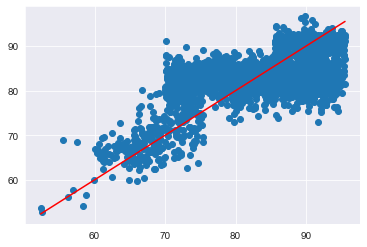



****************************************************************************************************





AdaBoostRegressor


Training score : 0.2711


Test Score : 0.2243


K-fold accuracy : 0.2783


Standard Deviation of Accuracies in k-fold : 0.0137


Mean Absolute Error : 6.7282


Mean Squared Error : 60.9071


Mean Squared Log Error : 0.0092




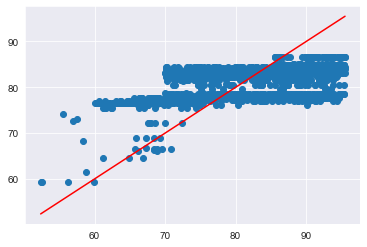



****************************************************************************************************





RandomForest Regressor


Training score : 0.9319


Test Score : 0.4934


K-fold accuracy : 0.5113


Standard Deviation of Accuracies in k-fold : 0.0239


Mean Absolute Error : 5.1017


Mean Squared Error : 39.7798


Mean Squared Log Error : 0.0058




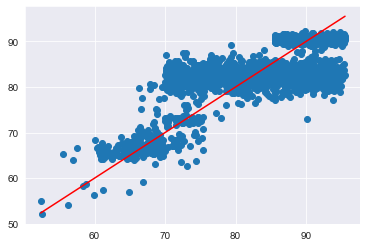



****************************************************************************************************





Linear Regression


Training score : 0.3639


Test Score : 0.3262


K-fold accuracy : 0.3538


Standard Deviation of Accuracies in k-fold : 0.0259


Mean Absolute Error : 6.0896


Mean Squared Error : 52.9056


Mean Squared Log Error : 0.0079




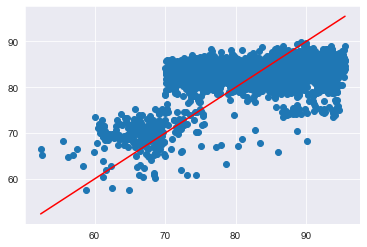



****************************************************************************************************





KNeigbors Regressor


Training score : 0.4660


Test Score : 0.1798


K-fold accuracy : 0.1881


Standard Deviation of Accuracies in k-fold : 0.0229


Mean Absolute Error : 6.5616


Mean Squared Error : 64.4044


Mean Squared Log Error : 0.0098




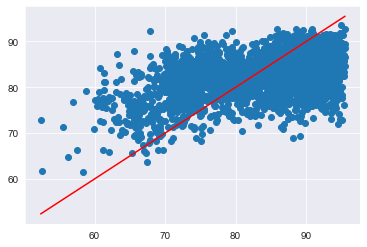



****************************************************************************************************



Wall time: 1min 35s


In [156]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [157]:
pre_final

[(['XGBRegressor',
   0.8300299797852543,
   0.44966410921283895,
   0.4451036984245125,
   0.023594006503742528,
   5.33318238015087,
   43.211362141196986,
   0.0063222713027266],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostRegressor',
   0.2710901277214883,
   0.2242924637662661,
   0.27828453809001186,
   0.013706358752747592,
   6.728151804457788,
   60.90712930953465,
   0.009214763823578245],
  AdaBoostRegressor(random_state=42)

In [158]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBRegressor',
  0.8300299797852543,
  0.44966410921283895,
  0.4451036984245125,
  0.023594006503742528,
  5.33318238015087,
  43.211362141196986,
  0.0063222713027266],
 ['AdaBoostRegressor',
  0.2710901277214883,
  0.2242924637662661,
  0.27828453809001186,
  0.013706358752747592,
  6.728151804457788,
  60.90712930953465,
  0.009214763823578245],
 ['RandomForest Regressor',
  0.9319251480210484,
  0.493367808386175,
  0.5113308580729494,
  0.02394302681865168,
  5.101724878758487,
  39.779828048103795,
  0.005814882740029922],
 ['Linear Regression',
  0.3638532378382018,
  0.3261987503252892,
  0.35381683603269487,
  0.025900638019288144,
  6.08961619950372,
  52.90563508267607,
  0.007864576179473842],
 ['KNeigbors Regressor',
  0.4659536150723269,
  0.17975102793238662,
  0.1881409676266142,
  0.02294071941075984,
  6.561609117361785,
  64.40444094471387,
  0.009823804772820528]]

## Model Comparision and visualization

In [159]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "MSE" , "MLSE"])

me.sort_values(by = ["MLSE" , "MSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True)
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,MSE,MLSE
0,RandomForest Regressor,0.931925,0.493368,0.511331,0.023943,5.101725,39.779828,0.005815
1,XGBRegressor,0.830030,0.449664,0.445104,0.023594,5.333182,43.211362,0.006322
2,Linear Regression,0.363853,0.326199,0.353817,0.025901,6.089616,52.905635,0.007865
3,AdaBoostRegressor,0.271090,0.224292,0.278285,0.013706,6.728152,60.907129,0.009215
4,KNeigbors Regressor,0.465954,0.179751,0.188141,0.022941,6.561609,64.404441,0.009824


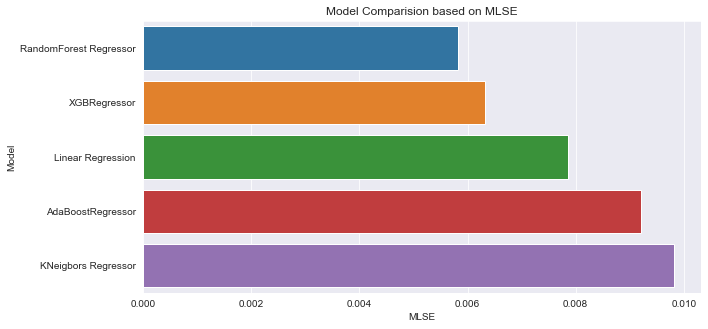

In [160]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "MLSE" , data = me)
plt.title("Model Comparision based on MLSE");

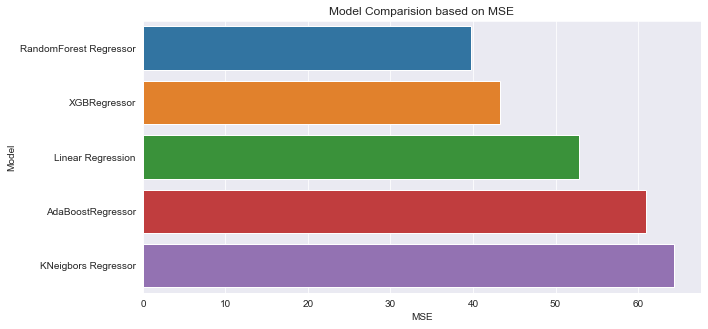

In [161]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "MSE" , data = me)
plt.title("Model Comparision based on MSE");

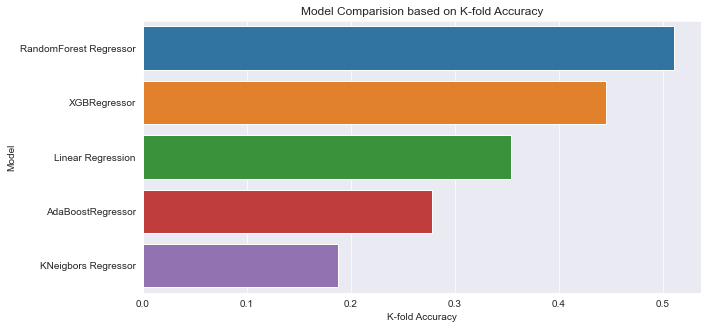

In [162]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "K-fold Accuracy" , data = me)
plt.title("Model Comparision based on K-fold Accuracy");

## GridsearchCV

In [165]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300 , 400]}


grid_ada = {"n_estimators" : [50 , 100 , 200]}


grid_random = {"n_estimators" : [100 , 200 , 250 , 300], 
#               "max_features" : ['auto', 'sqrt' , "log2"] , 
#               "min_samples_leaf" : [2, 4] , 
#               "max_depth" : [5 , 7 , 10 ]
              }
               


grid_linear = {"max_iter" : [100 , 150] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"]}


grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}



XGBRegressor


Best Parameters are : 
 {'n_estimators': 100}


Training score : -0.0021


Test Score : -0.0063


K-fold accuracy : -0.0070


Standard Deviation of Accuracies in k-fold : 0.0002


Mean Absolute Error : 5.3332


Mean Squared Error : 43.2114


Mean Squared Log Error : 0.0063




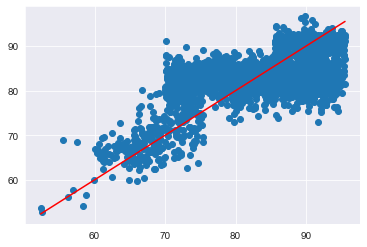



****************************************************************************************************



Wall time: 2min 58s


In [166]:
%%time

xgb = metrics(['XGBRegressor', GridSearchCV(XGBRegressor(random_state = 42 , objective ='reg:squarederror') , param_grid = grid_xgb , cv = 3 , verbose = 0 , scoring = "neg_mean_squared_log_error")] ,  X_train , y_train , X_test , y_test , params = True )



RandomForest Regressor


Best Parameters are : 
 {'n_estimators': 250}


Training score : -0.0008


Test Score : -0.0058


K-fold accuracy : -0.0061


Standard Deviation of Accuracies in k-fold : 0.0002


Mean Absolute Error : 5.0928


Mean Squared Error : 39.4931


Mean Squared Log Error : 0.0058




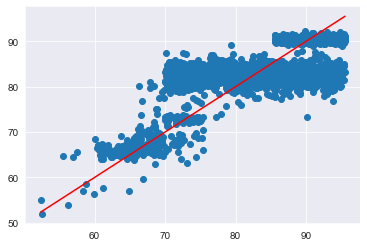



****************************************************************************************************



Wall time: 8min 22s


In [167]:
%%time

random = metrics(['RandomForest Regressor', GridSearchCV(RandomForestRegressor(random_state = 42) , param_grid = grid_random, cv = 3, verbose = 0 , scoring = "neg_mean_squared_log_error"  , n_jobs = -1)] ,  X_train , y_train , X_test , y_test , params = True )

In [168]:
final = [xgb , pre_final[1] , random , pre_final[-2] , pre_final[-1]]
final

[(['XGBRegressor',
   -0.0021331084509436087,
   -0.0063222713027266,
   -0.006969692802324905,
   0.00017663145669435533,
   5.33318238015087,
   43.211362141196986,
   0.0063222713027266],
  GridSearchCV(cv=3,
               estimator=XGBRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None, random_state=42

In [169]:
data_final = [x[0] for x in final]
data_final

[['XGBRegressor',
  -0.0021331084509436087,
  -0.0063222713027266,
  -0.006969692802324905,
  0.00017663145669435533,
  5.33318238015087,
  43.211362141196986,
  0.0063222713027266],
 ['AdaBoostRegressor',
  0.2710901277214883,
  0.2242924637662661,
  0.27828453809001186,
  0.013706358752747592,
  6.728151804457788,
  60.90712930953465,
  0.009214763823578245],
 ['RandomForest Regressor',
  -0.0008467576468671826,
  -0.005774049128798975,
  -0.006066829391830937,
  0.00022830669285857063,
  5.0928192628516005,
  39.49308911996819,
  0.005774049128798975],
 ['Linear Regression',
  0.3638532378382018,
  0.3261987503252892,
  0.35381683603269487,
  0.025900638019288144,
  6.08961619950372,
  52.90563508267607,
  0.007864576179473842],
 ['KNeigbors Regressor',
  0.4659536150723269,
  0.17975102793238662,
  0.1881409676266142,
  0.02294071941075984,
  6.561609117361785,
  64.40444094471387,
  0.009823804772820528]]

## Comparing model with gridsearchcv and without gridsearchcv

In [170]:
me # Without Gridsearchcv

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,MSE,MLSE
0,RandomForest Regressor,0.931925,0.493368,0.511331,0.023943,5.101725,39.779828,0.005815
1,XGBRegressor,0.830030,0.449664,0.445104,0.023594,5.333182,43.211362,0.006322
2,Linear Regression,0.363853,0.326199,0.353817,0.025901,6.089616,52.905635,0.007865
3,AdaBoostRegressor,0.271090,0.224292,0.278285,0.013706,6.728152,60.907129,0.009215
4,KNeigbors Regressor,0.465954,0.179751,0.188141,0.022941,6.561609,64.404441,0.009824


In [171]:
# With Gridsearchcv

me1 = pd.DataFrame(data_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "MSE" , "MLSE"])

me1.sort_values(by = ["MLSE" , "MSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True)
me1 = me1.reset_index(drop = True)
me1

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,MSE,MLSE
0,RandomForest Regressor,-0.000847,-0.005774,-0.006067,0.000228,5.092819,39.493089,0.005774
1,XGBRegressor,-0.002133,-0.006322,-0.006970,0.000177,5.333182,43.211362,0.006322
2,Linear Regression,0.363853,0.326199,0.353817,0.025901,6.089616,52.905635,0.007865
3,AdaBoostRegressor,0.271090,0.224292,0.278285,0.013706,6.728152,60.907129,0.009215
4,KNeigbors Regressor,0.465954,0.179751,0.188141,0.022941,6.561609,64.404441,0.009824


## Feature Importances

In [172]:
def feature_importance(model , X_train , y_train):
    model[1].fit(X_train , y_train)
    features = model[1].feature_importances_
    print(model[0])
    print("\n")
    print(f"Feature importance list : \n" , features)
    print("\n")
    plt.figure(figsize = (15 , 8))
    sns.barplot(X_train.columns.tolist() , features)
    plt.show()
    print("\n")
    print("*"*100)
    print("\n")
    return list(zip(features , X_train.columns))

XGBRegressor


Feature importance list : 
 [0.00381653 0.00467922 0.00508275 0.00985391 0.0052528  0.0246846
 0.00529735 0.00602075 0.00450167 0.08554448 0.10348976 0.00483984
 0.00513999 0.00691816 0.00458636 0.00468152 0.00568139 0.0047173
 0.00528414 0.0056014  0.00558316 0.00535388 0.00610279 0.00253957
 0.00523107 0.00332366 0.00668809 0.00510597 0.00453706 0.00543011
 0.00659627 0.00601323 0.00503369 0.00658751 0.00626068 0.00483342
 0.00606263 0.00547767 0.00543349 0.00450731 0.00629856 0.06083294
 0.02756584 0.00590253 0.00563319 0.00461506 0.00509064 0.01267823
 0.00412619 0.00870695 0.03121919 0.01105026 0.34172353 0.01682078
 0.0453608 ]




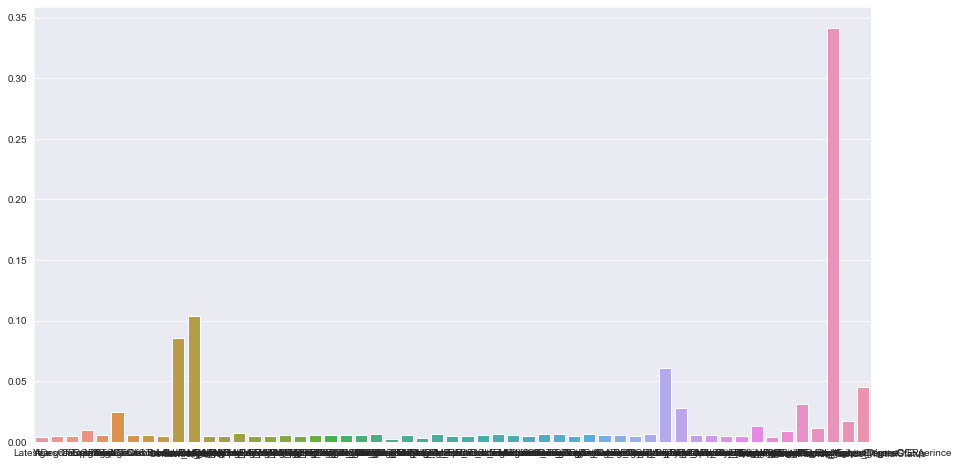



****************************************************************************************************




In [173]:
xgb_fi = feature_importance(["XGBRegressor" , XGBRegressor(objective ='reg:squarederror', random_state = 42 , n_estimators = 100)] , X_train , y_train)

In [174]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [175]:
xgb_df

,Feature Importances,Feartures
0,0.341724,BiasInfluentialFactor_LatestDegreeCGPA
1,0.103490,Gender_Other
2,0.085544,Gender_Male
3,0.060833,CurrentCompanyType_MidSized
4,0.045361,BiasInfluentialFactor_YearsOfExperince
5,0.031219,BiasInfluentialFactor_Gender
6,0.027566,CurrentCompanyType_Startup
7,0.024685,EmpScore
8,0.016821,BiasInfluentialFactor_MartialStatus
9,0.012678,BiasInfluentialFactor_DegreeBranch


RandomForestRegressor


Feature importance list : 
 [0.03348956 0.03091028 0.02936567 0.08888948 0.04508969 0.07752827
 0.05189532 0.0095165  0.00516409 0.11345573 0.02755995 0.00372992
 0.00396909 0.0086182  0.00812563 0.0028747  0.00482404 0.00509984
 0.00507273 0.00661082 0.00537813 0.00373703 0.00572956 0.0008447
 0.00482504 0.00198137 0.00903941 0.00590752 0.00185611 0.00589196
 0.00812791 0.00885978 0.00684245 0.01260737 0.00258614 0.00091828
 0.00667559 0.00520399 0.00907074 0.00243964 0.00742407 0.07775079
 0.0488222  0.0075804  0.00855886 0.00422909 0.00532355 0.01016387
 0.00204373 0.00266813 0.0324155  0.00331061 0.09381504 0.00207688
 0.02350507]




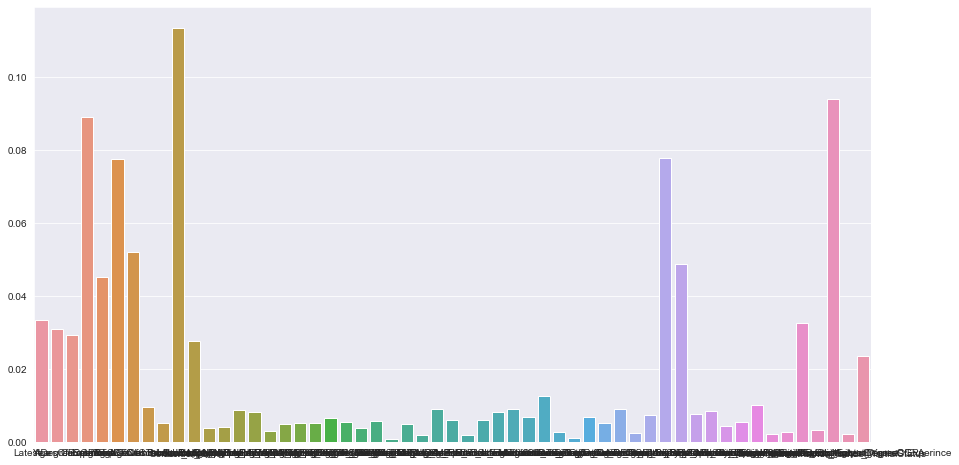



****************************************************************************************************




In [176]:
random_fi = feature_importance(["RandomForestRegressor" , RandomForestRegressor(random_state = 42 , n_estimators = 250)] , X_train , y_train)

In [177]:
random_df = pd.DataFrame(random_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [178]:
random_df

,Feature Importances,Feartures
0,0.113456,Gender_Male
1,0.093815,BiasInfluentialFactor_LatestDegreeCGPA
2,0.088889,CurrentCTC
3,0.077751,CurrentCompanyType_MidSized
4,0.077528,EmpScore
5,0.051895,TotalLeavesTaken
6,0.048822,CurrentCompanyType_Startup
7,0.045090,ExpectedCTC
8,0.033490,Age
9,0.032416,BiasInfluentialFactor_Gender


## Final Model Evaluation

In [180]:
random = pre_final[2][1]
random

RandomForestRegressor(random_state=42)

In [181]:
random = RandomForestRegressor(random_state = 42 , n_estimators = 250)

In [182]:
random.fit(X_train , y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [183]:
preds = random.predict(test)

In [184]:
preds

array([91.21516, 90.68748, 83.01092, ..., 83.4386 , 65.34176, 64.85084])

In [185]:
num_preds = pd.DataFrame(preds , columns = ["FitmentPercent"])
num_preds

,FitmentPercent
0,91.21516
1,90.68748
2,83.01092
3,65.92400
4,79.64520
...,...
8740,82.91724
8741,82.23804
8742,83.43860
8743,65.34176


In [186]:
num_preds.to_csv("Fitment Preds 1.csv")

In [187]:
bias = pd.read_csv("Bias Preds 1.csv")
bias.head()

,Unnamed: 0,Bias
0,0,DegreeBranch
1,1,DegreeBranch
2,2,MartialStatus
3,3,CurrentCompanyType
4,4,Gender


In [188]:
biases = bias["Bias"]
biases

0             DegreeBranch
1             DegreeBranch
2            MartialStatus
3       CurrentCompanyType
4                   Gender
               ...        
8740                Gender
8741         HighestDegree
8742          DegreeBranch
8743    CurrentCompanyType
8744      LatestDegreeCGPA
Name: Bias, Length: 8745, dtype: object

In [189]:
data = {"EmpID" : ids , 
        "BiasInfluentialFactor" : biases ,
        "FitmentPercent" : xgb_preds}
final = pd.DataFrame(data)

In [190]:
final.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,89.681419
1,23568,DegreeBranch,91.609062
2,21490,MartialStatus,79.058327
3,8363,CurrentCompanyType,56.139606
4,6165,Gender,80.393372


## Bias Predictor Amazon

## Importing all required libraries

In [30]:
import numpy as np                   # For creating matrices and for number operations
import pandas as pd                  # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns                # To plot heatmaps
sns.set_style("darkgrid")                
import warnings                      # Hide warnings
warnings.filterwarnings('ignore')
%load_ext jupyternotify

In [31]:
# Loading dataset

df = pd.read_csv("Data/Primary/Amazon Hiring/Train.csv")
df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [32]:
# Droping Unnecessory columns

df.drop(["GraduationYear" , "EmpID" , "EmpName"] , axis = 1 , inplace = True)

In [33]:
fit = pd.read_csv("Fitment Preds.csv")
fit = fit["FitmentPercent"]
fit

0       89.681420
1       91.609060
2       79.058330
3       56.139606
4       80.393370
          ...    
8740    78.249374
8741    75.718254
8742    79.756256
8743    54.553688
8744    47.126640
Name: FitmentPercent, Length: 8745, dtype: float64

In [34]:
test = pd.read_csv("Data/Primary/Amazon Hiring/Test.csv")
test["FitmentPercent"] = fit
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,2016,27,34,Single,4,SDE,Enterprise,Finance,18,89.681420
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,2009,29,33,Married,4,EM,Enterprise,Engineering,8,91.609060
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,2019,18,25,Married,3,SDE,Startup,Engineering,18,79.058330
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,2010,7,12,Single,5,DS,Enterprise,Product,17,56.139606
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,2015,22,32,Married,4,SDE,Startup,Engineering,9,80.393370


In [35]:
test.drop(["GraduationYear" , "EmpID" , "EmpName"] , axis = 1 , inplace = True)

In [36]:
cats = df.select_dtypes(include="object").columns.to_list()
cats

['LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany',
 'BiasInfluentialFactor']

In [37]:
ints = df.select_dtypes(exclude="object").columns.to_list()
ints

['Age',
 'LatestDegreeCGPA',
 'YearsOfExperince',
 'CurrentCTC',
 'ExpectedCTC',
 'EmpScore',
 'TotalLeavesTaken',
 'FitmentPercent']

## Data Preprocesisng

In [38]:
for i in ints:
    df[i] = np.log(df[i] + 1)

In [39]:
for i in ints:
    test[i] = np.log(test[i] + 1)

In [40]:
df.dropna(subset = ["BiasInfluentialFactor"] , inplace = True)

In [41]:
cats.pop()

'BiasInfluentialFactor'

In [42]:
df.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,3.583519,Male,JR85289,B.Tech,Electrical,Tier 1,2.079442,2.564949,3.091042,3.295837,Married,1.791759,SSE,Enterprise,Design,3.044522,YearsOfExperince,4.568506
2,English,3.610918,Female,JR87525,PhD,Computer Science,Tier 1,1.945910,1.945910,2.772589,3.218876,Single,1.791759,SDE,MidSized,Engineering,2.995732,Gender,4.524611
3,English,3.401197,Female,JR87525,BCA,Information Technology,Tier 2,1.791759,1.945910,2.833213,3.218876,Married,1.791759,SDE,Startup,Product,2.833213,Gender,4.294424
4,English,3.258097,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,2.197225,1.098612,3.218876,3.496508,Married,1.791759,SDE,Enterprise,Engineering,2.397895,DegreeBranch,4.469809
5,Native,3.583519,Male,JR88879,BCA,Computer Science,Tier 2,2.302585,2.564949,3.258097,3.401197,Married,1.609438,DS,MidSized,Engineering,2.397895,YearsOfExperince,4.545739


In [43]:
test.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent
0,Native,3.583519,Male,JR85289,PhD,Information Technology,Tier 2,1.791759,1.791759,3.332205,3.555348,Single,1.609438,SDE,Enterprise,Finance,2.944439,4.507352
1,English,3.583519,Male,JR85289,B.Tech,Information Technology,Tier 3,2.302585,2.564949,3.401197,3.526361,Married,1.609438,EM,Enterprise,Engineering,2.197225,4.528387
2,English,3.367296,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,2.302585,1.098612,2.944439,3.258097,Married,1.386294,SDE,Startup,Engineering,2.944439,4.382755
3,Hindi,3.637586,Male,JR87525,MS,Computer Science,Tier 2,2.197225,2.484907,2.079442,2.564949,Single,1.791759,DS,Enterprise,Product,2.890372,4.045498
4,Hindi,3.610918,Female,JR85289,PhD,Artificial Intelligence,Tier 2,2.079442,1.945910,3.135494,3.496508,Married,1.609438,SDE,Startup,Engineering,2.302585,4.399294


In [44]:
cats

['LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany']

In [45]:
df = pd.get_dummies(df , columns = cats , prefix = cats , drop_first = True)

In [46]:
test = pd.get_dummies(test , columns = cats , prefix = cats , drop_first = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10309 entries, 0 to 13644
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      10309 non-null  float64
 1   LatestDegreeCGPA                         10309 non-null  float64
 2   YearsOfExperince                         10309 non-null  float64
 3   CurrentCTC                               10309 non-null  float64
 4   ExpectedCTC                              10309 non-null  float64
 5   EmpScore                                 10309 non-null  float64
 6   TotalLeavesTaken                         10309 non-null  float64
 7   BiasInfluentialFactor                    10309 non-null  object 
 8   FitmentPercent                           10309 non-null  float64
 9   LanguageOfCommunication_Hindi            10309 non-null  uint8  
 10  LanguageOfCommunication_Native           10309

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      8745 non-null   float64
 1   LatestDegreeCGPA                         8745 non-null   float64
 2   YearsOfExperince                         8745 non-null   float64
 3   CurrentCTC                               8745 non-null   float64
 4   ExpectedCTC                              8745 non-null   float64
 5   EmpScore                                 8745 non-null   float64
 6   TotalLeavesTaken                         8745 non-null   float64
 7   FitmentPercent                           8745 non-null   float64
 8   LanguageOfCommunication_Hindi            8745 non-null   uint8  
 9   LanguageOfCommunication_Native           8745 non-null   uint8  
 10  Gender_Male                              8745 no

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop(["BiasInfluentialFactor"] , axis = 1)
y = df["BiasInfluentialFactor"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8247, 2062, 8247, 2062)

## Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train[ints] = scaler1.fit_transform(X_train[ints])
X_test[ints] = scaler1.transform(X_test[ints])

In [51]:
test[ints] = scaler1.transform(test[ints])

In [52]:
X_train.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
10883,1.101949,-0.021633,0.746480,-0.922216,-1.465832,0.522811,-0.201719,-1.640178,0,0,...,0,0,0,1,0,0,0,1,0,0
1691,-1.234287,-0.021633,-0.902315,-1.348752,-1.084053,1.235160,-0.954541,-0.777332,0,0,...,0,1,0,0,0,1,1,0,0,0
11427,-1.540772,-0.021633,-1.419977,0.886638,1.071380,-1.473038,1.211561,-0.561875,1,0,...,1,0,0,0,0,1,0,0,0,0
771,0.395339,-0.021633,-1.419977,-2.183183,-2.138867,-0.349034,1.326900,0.896506,0,1,...,0,0,0,0,0,1,1,0,0,0
297,-1.540772,-2.609680,-1.419977,0.272845,0.107878,-1.473038,-2.065624,0.613963,1,0,...,1,0,0,0,0,0,0,1,0,0


In [54]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,1.101949,-1.605738,-0.172712,1.060012,1.071380,0.522811,1.090304,0.858740,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1.101949,1.207093,1.218584,1.221419,0.977421,0.522811,-0.676103,1.039868,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.653976,1.207093,-1.419977,0.152846,0.107878,-0.349034,1.090304,-0.214165,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1.541023,0.626932,1.074553,-1.870790,-2.138867,1.235160,0.962490,-3.118296,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1.324453,-0.021633,0.104671,0.599814,0.880656,0.522811,-0.427032,-0.071754,1,0,...,0,1,0,0,0,1,0,1,0,0


## Model fitting and evaluation 

In [55]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix , roc_auc_score , f1_score , accuracy_score , classification_report , roc_curve , auc , plot_roc_curve
from sklearn.model_selection import cross_val_score

In [62]:
models = []
models.append(['XGBClassifier', XGBClassifier(random_state = 42 , eval_metric='mlogloss')])
models.append(['AdaBoostClassifier', AdaBoostClassifier(random_state = 42)])
models.append(['RandomForest', RandomForestClassifier(random_state = 42)])
models.append(['Logistic Regression', LogisticRegression(random_state = 42)])
models.append(['KNeigbors', KNeighborsClassifier()])

In [63]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    # roc = roc_auc_score(y_test , preds , multi_class='ovr' , average = "weighted")
    # fpr, tpr, thresholds = roc_curve(y_test, preds)
    # ac = auc(fpr, tpr)
    f1 = f1_score(y_test , preds , average = "weighted")
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (20 , 10))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    # print(f"ROC AUC Score: {roc:.4f}")
    # print('\n')
    
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    # print(f"AUC : {ac:.4f}")
    # print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")

    # plt.figure(figsize = (10, 8))
    # plot_roc_curve(model[1], X_test, y_test , color = '#FF4500')
    # plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
    # plt.show()
    # print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    # sam.append(roc)
    sam.append(f1)
    # sam.append(ac)
    
    return sam , mod



XGBClassifier


Confusion matrix : 



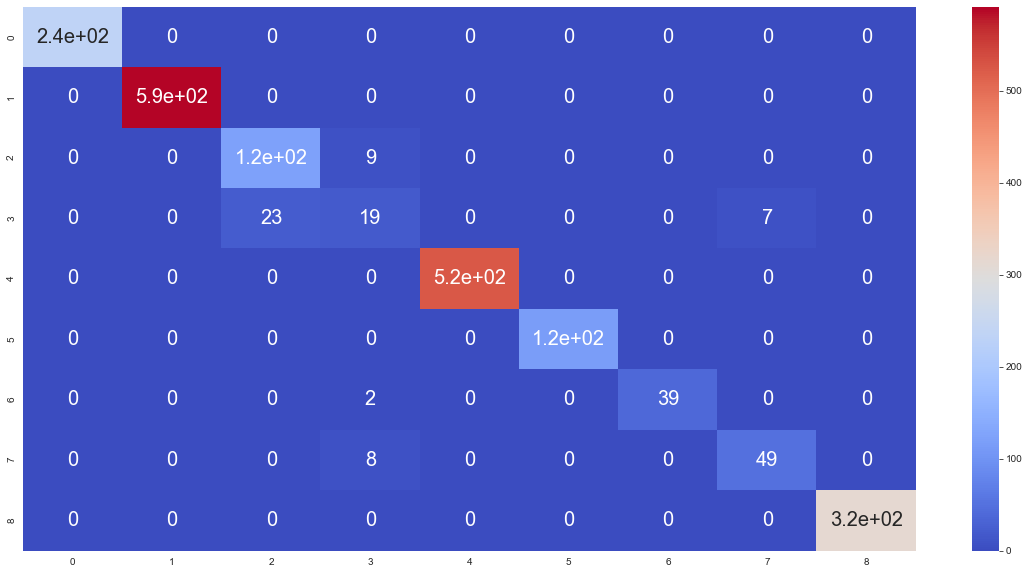



Training score : 1.0000


Test Score : 0.9762


K-fold accuracy : 0.9693


Standard Deviation of Accuracies in k-fold : 0.0047


F1 Score: 0.9751


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       1.00      1.00      1.00       235
      DegreeBranch       1.00      1.00      1.00       591
          EmpScore       0.84      0.93      0.88       132
        Ethinicity       0.50      0.39      0.44        49
            Gender       1.00      1.00      1.00       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       1.00      0.95      0.97        41
     MartialStatus       0.88      0.86      0.87        57
  YearsOfExperince       1.00      1.00      1.00       315

          accuracy                           0.98      2062
         macro avg       0.91      0.90      0.91      2062
      weighted avg       0.97      0.98      0.98      2062








AdaBoostClassifier


Confusion mat

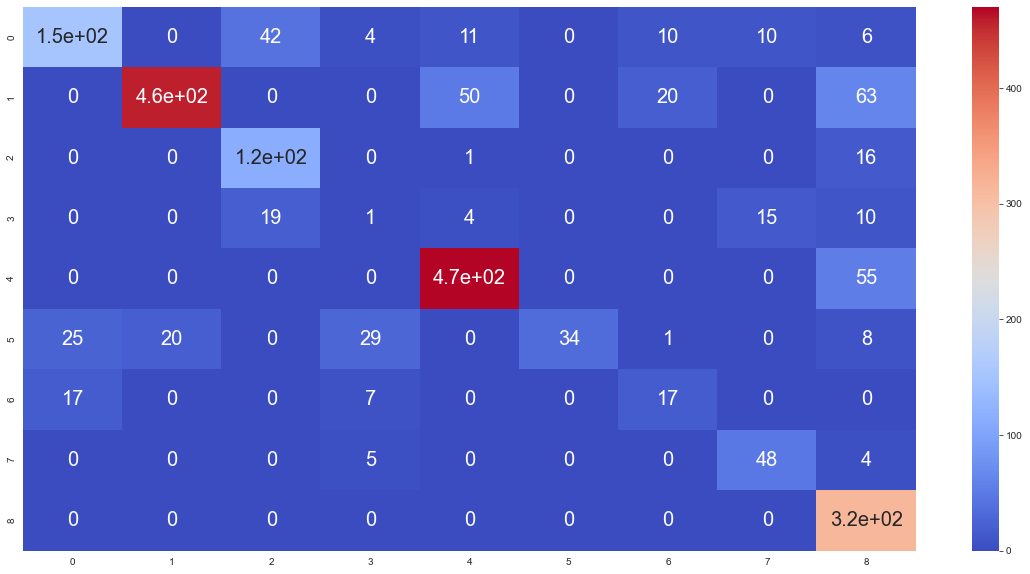



Training score : 0.7640


Test Score : 0.7808


K-fold accuracy : 0.7286


Standard Deviation of Accuracies in k-fold : 0.0564


F1 Score: 0.7753


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.78      0.65      0.71       235
      DegreeBranch       0.96      0.77      0.86       591
          EmpScore       0.65      0.87      0.75       132
        Ethinicity       0.02      0.02      0.02        49
            Gender       0.88      0.90      0.89       525
     HighestDegree       1.00      0.29      0.45       117
  LatestDegreeCGPA       0.35      0.41      0.38        41
     MartialStatus       0.66      0.84      0.74        57
  YearsOfExperince       0.66      1.00      0.80       315

          accuracy                           0.78      2062
         macro avg       0.66      0.64      0.62      2062
      weighted avg       0.81      0.78      0.78      2062








RandomForest


Confusion matrix : 

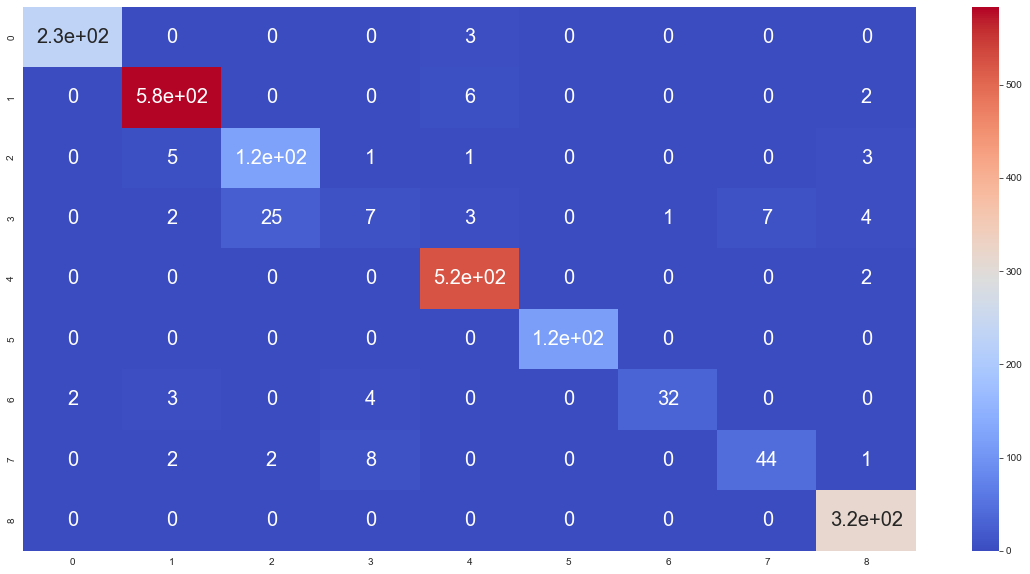



Training score : 1.0000


Test Score : 0.9578


K-fold accuracy : 0.9489


Standard Deviation of Accuracies in k-fold : 0.0046


F1 Score: 0.9523


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.99      0.99      0.99       235
      DegreeBranch       0.98      0.99      0.98       591
          EmpScore       0.82      0.92      0.87       132
        Ethinicity       0.35      0.14      0.20        49
            Gender       0.98      1.00      0.99       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       0.97      0.78      0.86        41
     MartialStatus       0.86      0.77      0.81        57
  YearsOfExperince       0.96      1.00      0.98       315

          accuracy                           0.96      2062
         macro avg       0.88      0.84      0.85      2062
      weighted avg       0.95      0.96      0.95      2062








Logistic Regression


Confusion ma

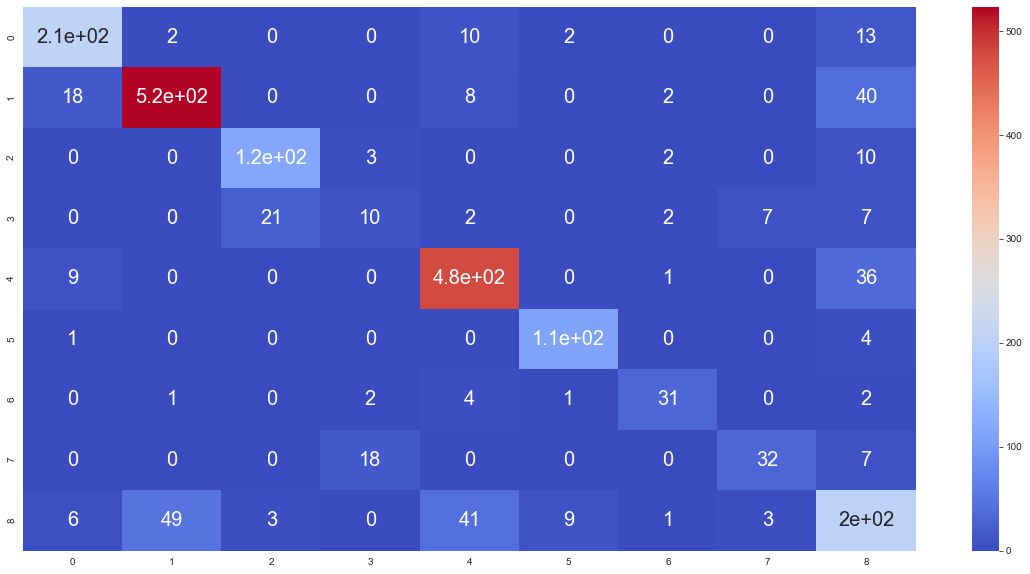



Training score : 0.8484


Test Score : 0.8317


K-fold accuracy : 0.8304


Standard Deviation of Accuracies in k-fold : 0.0137


F1 Score: 0.8287


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.86      0.89      0.87       235
      DegreeBranch       0.91      0.88      0.90       591
          EmpScore       0.83      0.89      0.86       132
        Ethinicity       0.30      0.20      0.24        49
            Gender       0.88      0.91      0.90       525
     HighestDegree       0.90      0.96      0.93       117
  LatestDegreeCGPA       0.79      0.76      0.77        41
     MartialStatus       0.76      0.56      0.65        57
  YearsOfExperince       0.63      0.64      0.64       315

          accuracy                           0.83      2062
         macro avg       0.76      0.74      0.75      2062
      weighted avg       0.83      0.83      0.83      2062








KNeigbors


Confusion matrix : 



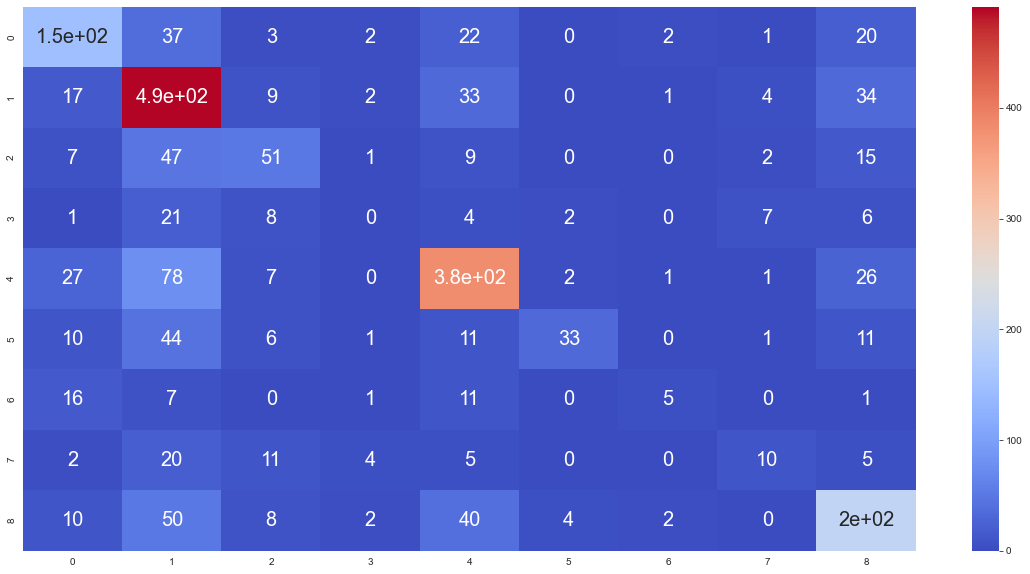



Training score : 0.7897


Test Score : 0.6402


K-fold accuracy : 0.6327


Standard Deviation of Accuracies in k-fold : 0.0132


F1 Score: 0.6196


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.62      0.63      0.63       235
      DegreeBranch       0.62      0.83      0.71       591
          EmpScore       0.50      0.39      0.43       132
        Ethinicity       0.00      0.00      0.00        49
            Gender       0.74      0.73      0.73       525
     HighestDegree       0.80      0.28      0.42       117
  LatestDegreeCGPA       0.45      0.12      0.19        41
     MartialStatus       0.38      0.18      0.24        57
  YearsOfExperince       0.63      0.63      0.63       315

          accuracy                           0.64      2062
         macro avg       0.53      0.42      0.44      2062
      weighted avg       0.63      0.64      0.62      2062






Wall time: 2min 25s


In [64]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

## Upsampling imbalanced data with SMOTE 

In [72]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
y_train.value_counts()

DegreeBranch          2267
Gender                2080
YearsOfExperince      1246
CurrentCompanyType     939
EmpScore               527
HighestDegree          465
Ethinicity             279
MartialStatus          223
LatestDegreeCGPA       221
Name: BiasInfluentialFactor, dtype: int64

In [73]:
X_train_1, y_train_1 = oversample.fit_resample(X_train , y_train)
y_train_1.value_counts()

MartialStatus         2267
CurrentCompanyType    2267
HighestDegree         2267
DegreeBranch          2267
Gender                2267
YearsOfExperince      2267
EmpScore              2267
LatestDegreeCGPA      2267
Ethinicity            2267
Name: BiasInfluentialFactor, dtype: int64



XGBClassifier


Confusion matrix : 



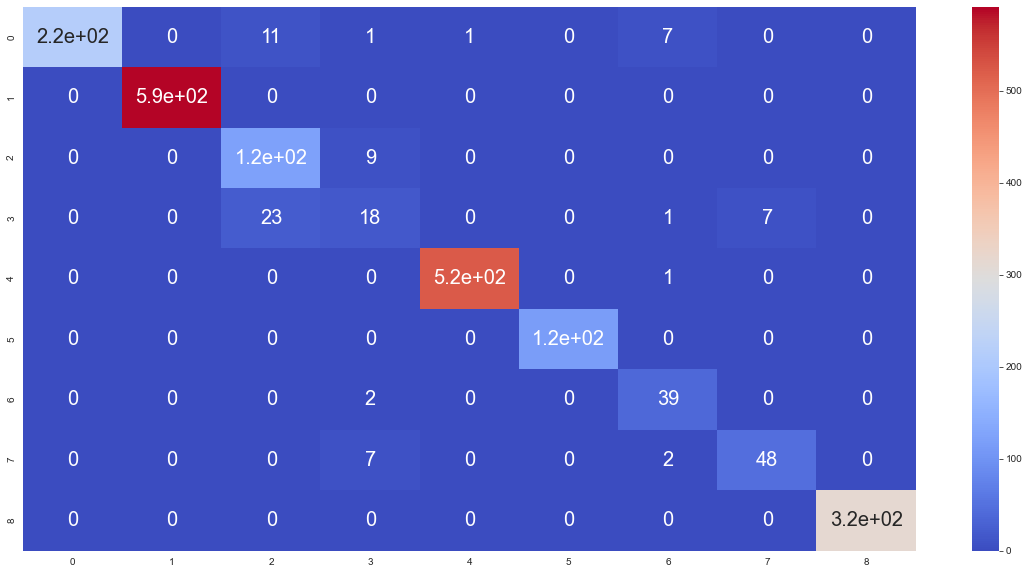



Training score : 1.0000


Test Score : 0.9651


K-fold accuracy : 0.9777


Standard Deviation of Accuracies in k-fold : 0.0027


F1 Score: 0.9643


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       1.00      0.91      0.96       235
      DegreeBranch       1.00      1.00      1.00       591
          EmpScore       0.78      0.93      0.85       132
        Ethinicity       0.49      0.37      0.42        49
            Gender       1.00      1.00      1.00       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       0.78      0.95      0.86        41
     MartialStatus       0.87      0.84      0.86        57
  YearsOfExperince       1.00      1.00      1.00       315

          accuracy                           0.97      2062
         macro avg       0.88      0.89      0.88      2062
      weighted avg       0.97      0.97      0.96      2062








AdaBoostClassifier


Confusion mat

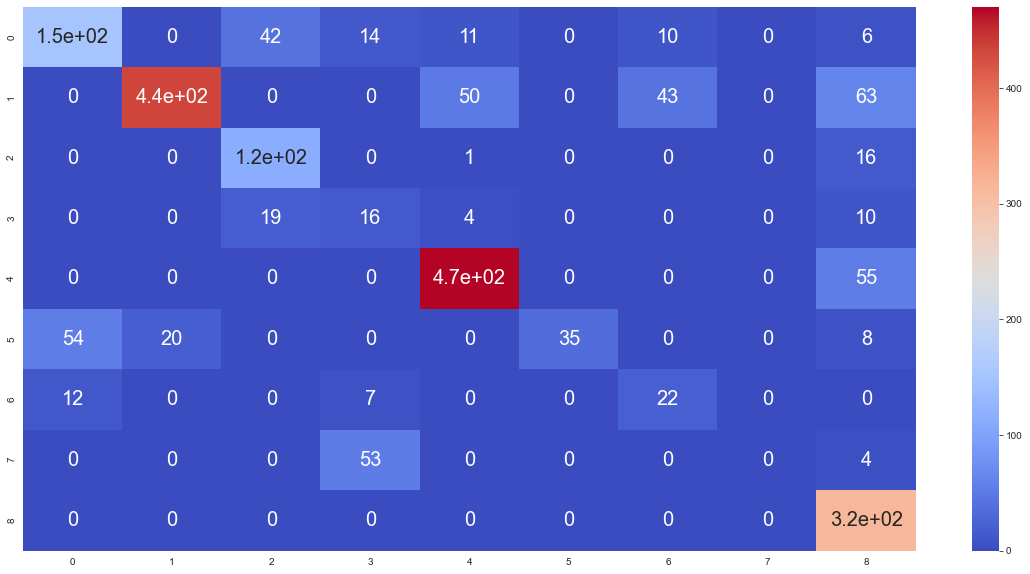



Training score : 0.6125


Test Score : 0.7565


K-fold accuracy : 0.6031


Standard Deviation of Accuracies in k-fold : 0.0297


F1 Score: 0.7489


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.70      0.65      0.67       235
      DegreeBranch       0.96      0.74      0.83       591
          EmpScore       0.65      0.87      0.75       132
        Ethinicity       0.18      0.33      0.23        49
            Gender       0.88      0.90      0.89       525
     HighestDegree       1.00      0.30      0.46       117
  LatestDegreeCGPA       0.29      0.54      0.38        41
     MartialStatus       0.00      0.00      0.00        57
  YearsOfExperince       0.66      1.00      0.80       315

          accuracy                           0.76      2062
         macro avg       0.59      0.59      0.56      2062
      weighted avg       0.79      0.76      0.75      2062








RandomForest


Confusion matrix : 

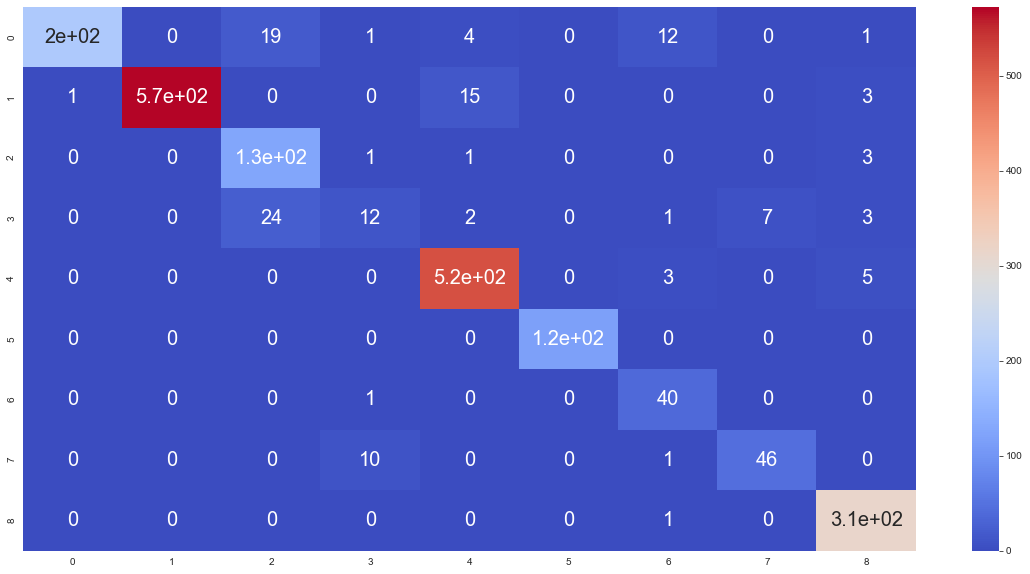



Training score : 1.0000


Test Score : 0.9423


K-fold accuracy : 0.9767


Standard Deviation of Accuracies in k-fold : 0.0056


F1 Score: 0.9398


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.99      0.84      0.91       235
      DegreeBranch       1.00      0.97      0.98       591
          EmpScore       0.75      0.96      0.84       132
        Ethinicity       0.48      0.24      0.32        49
            Gender       0.96      0.98      0.97       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       0.69      0.98      0.81        41
     MartialStatus       0.87      0.81      0.84        57
  YearsOfExperince       0.95      1.00      0.98       315

          accuracy                           0.94      2062
         macro avg       0.85      0.86      0.85      2062
      weighted avg       0.94      0.94      0.94      2062








Logistic Regression


Confusion ma

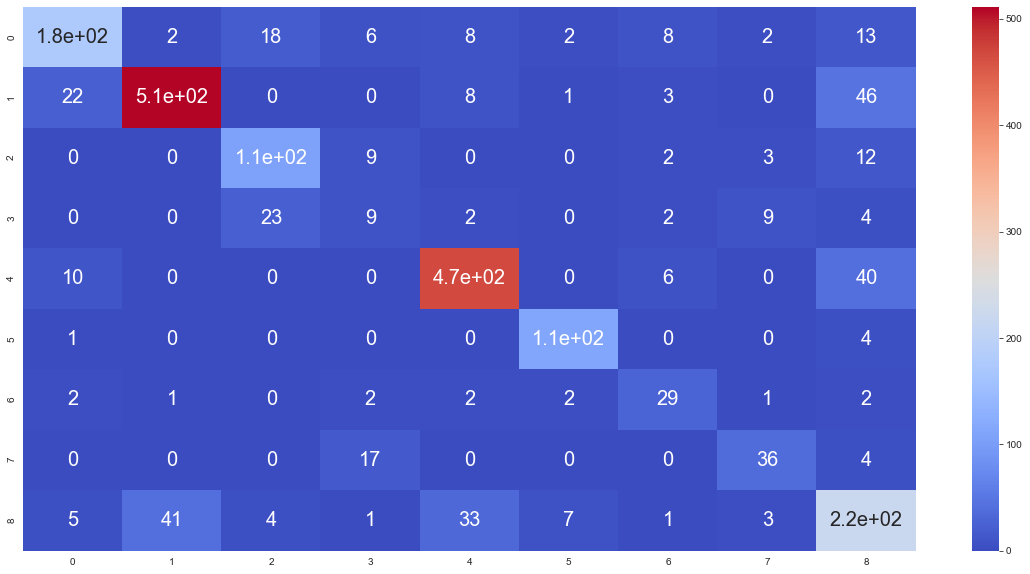



Training score : 0.7987


Test Score : 0.8089


K-fold accuracy : 0.7843


Standard Deviation of Accuracies in k-fold : 0.0239


F1 Score: 0.8103


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.81      0.75      0.78       235
      DegreeBranch       0.92      0.86      0.89       591
          EmpScore       0.70      0.80      0.75       132
        Ethinicity       0.20      0.18      0.19        49
            Gender       0.90      0.89      0.90       525
     HighestDegree       0.90      0.96      0.93       117
  LatestDegreeCGPA       0.57      0.71      0.63        41
     MartialStatus       0.67      0.63      0.65        57
  YearsOfExperince       0.64      0.70      0.67       315

          accuracy                           0.81      2062
         macro avg       0.70      0.72      0.71      2062
      weighted avg       0.81      0.81      0.81      2062








KNeigbors


Confusion matrix : 



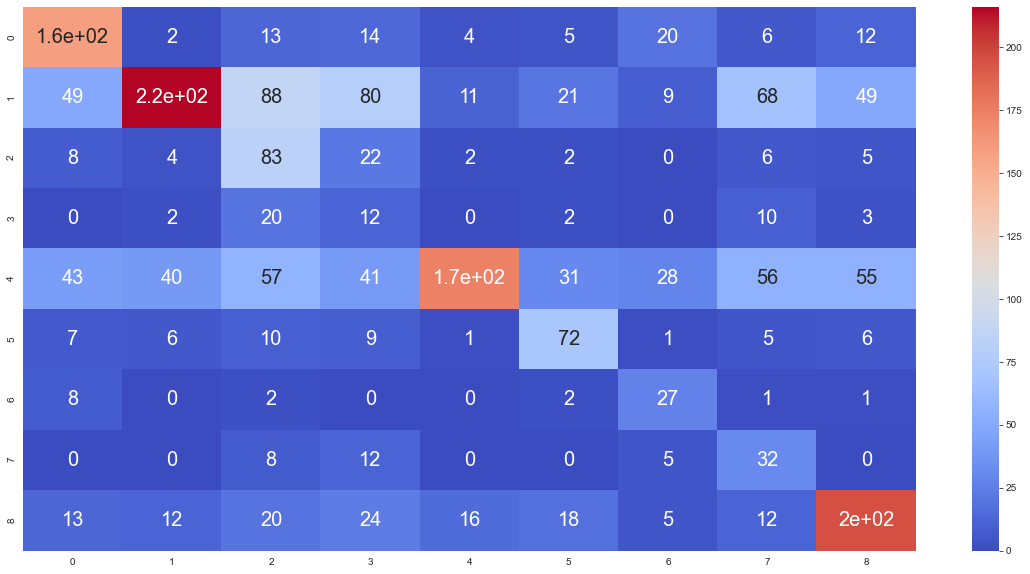



Training score : 0.8846


Test Score : 0.4704


K-fold accuracy : 0.8106


Standard Deviation of Accuracies in k-fold : 0.0173


F1 Score: 0.4969


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.55      0.68      0.61       235
      DegreeBranch       0.77      0.37      0.49       591
          EmpScore       0.28      0.63      0.38       132
        Ethinicity       0.06      0.24      0.09        49
            Gender       0.84      0.33      0.47       525
     HighestDegree       0.47      0.62      0.53       117
  LatestDegreeCGPA       0.28      0.66      0.40        41
     MartialStatus       0.16      0.56      0.25        57
  YearsOfExperince       0.60      0.62      0.61       315

          accuracy                           0.47      2062
         macro avg       0.44      0.52      0.43      2062
      weighted avg       0.64      0.47      0.50      2062






Wall time: 7min 53s


In [74]:
%%time

pre_final_1 = []
for i in models:
    sam = metrics(i , X_train_1 , y_train_1 , X_test , y_test)
    pre_final_1.append(sam)

In [75]:
pre_final_1

[(['XGBClassifier',
   0.9999509875998628,
   0.965082444228904,
   0.9777485325340327,
   0.002719935176662301,
   0.9643196144782871],
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, objective='multi:softprob', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostClassifier',
   0.6125079645150223,
   0.7565470417070805,
   0.6030525213515097,
   0.029669836389438008,
   0.7489055475891705],
  AdaBoostClassifier(random_state=42)),
 (['Rand

In [76]:
data_pre_final_1 = [x[0] for x in pre_final_1]
data_pre_final_1

[['XGBClassifier',
  0.9999509875998628,
  0.965082444228904,
  0.9777485325340327,
  0.002719935176662301,
  0.9643196144782871],
 ['AdaBoostClassifier',
  0.6125079645150223,
  0.7565470417070805,
  0.6030525213515097,
  0.029669836389438008,
  0.7489055475891705],
 ['RandomForest',
  1.0,
  0.9422890397672163,
  0.9767200094148389,
  0.005648592204579131,
  0.9397942979535131],
 ['Logistic Regression',
  0.7986570602362397,
  0.8089233753637245,
  0.784250895850746,
  0.023921900050471255,
  0.8102549854168071],
 ['KNeigbors',
  0.8845757976768123,
  0.47041707080504364,
  0.8105694536511322,
  0.017251531808762054,
  0.49694122244812927]]

In [65]:
pre_final

[(['XGBClassifier',
   1.0,
   0.9762366634335596,
   0.9693234774933804,
   0.004658063793044959,
   0.9750808353854715],
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, objective='multi:softprob', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostClassifier',
   0.7640354068145992,
   0.7807953443258971,
   0.7286393056781406,
   0.056431842854749725,
   0.7753068261948395],
  AdaBoostClassifier(random_state=42)),
 (['RandomForest',
   

In [66]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBClassifier',
  1.0,
  0.9762366634335596,
  0.9693234774933804,
  0.004658063793044959,
  0.9750808353854715],
 ['AdaBoostClassifier',
  0.7640354068145992,
  0.7807953443258971,
  0.7286393056781406,
  0.056431842854749725,
  0.7753068261948395],
 ['RandomForest',
  1.0,
  0.957807953443259,
  0.9489499852897911,
  0.0045972713643641005,
  0.9523198121530356],
 ['Logistic Regression',
  0.8484297320237663,
  0.8317167798254123,
  0.8303643718740806,
  0.013718161692595106,
  0.8287315119513806],
 ['KNeigbors',
  0.7897417242633685,
  0.6401551891367604,
  0.6327159458664313,
  0.013157822576011932,
  0.619553940525463]]

## Model preformance visualization

In [67]:
# Without upsampling

me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score"])

me.sort_values(by = [ "F1 Score" , "K-fold Accuracy" , "Train Score" , "Test Score"] , inplace = True , ascending = False)
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,F1 Score
0,XGBClassifier,1.000000,0.976237,0.969323,0.004658,0.975081
1,RandomForest,1.000000,0.957808,0.948950,0.004597,0.952320
2,Logistic Regression,0.848430,0.831717,0.830364,0.013718,0.828732
3,AdaBoostClassifier,0.764035,0.780795,0.728639,0.056432,0.775307
4,KNeigbors,0.789742,0.640155,0.632716,0.013158,0.619554


In [77]:
# With upsampling

me_1 = pd.DataFrame(data_pre_final_1 , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score"])

me_1.sort_values(by = [ "F1 Score" , "K-fold Accuracy" , "Train Score" , "Test Score"] , inplace = True , ascending = False)
me_1 = me_1.reset_index(drop = True)
me_1

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,F1 Score
0,XGBClassifier,0.999951,0.965082,0.977749,0.002720,0.964320
1,RandomForest,1.000000,0.942289,0.976720,0.005649,0.939794
2,Logistic Regression,0.798657,0.808923,0.784251,0.023922,0.810255
3,AdaBoostClassifier,0.612508,0.756547,0.603053,0.029670,0.748906
4,KNeigbors,0.884576,0.470417,0.810569,0.017252,0.496941


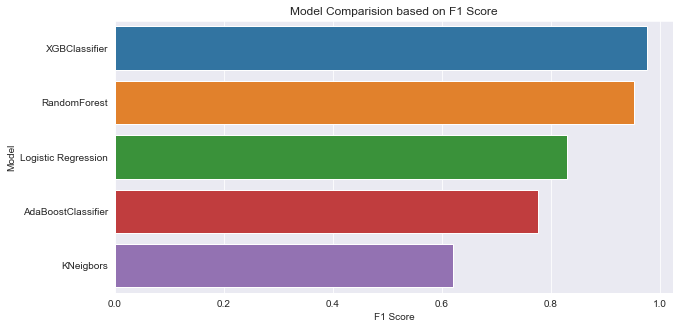

In [68]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "F1 Score" , data = me)
plt.title("Model Comparision based on F1 Score");

## GridsearchCV

In [69]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300]}


grid_ada = {"n_estimators" : [50 , 100 , 200]}


grid_random = {"n_estimators" : [150 , 200 , 250],
              "bootstrap" : [True , False] , 
              "max_features" : ['auto', 'sqrt'] , 
              "min_samples_leaf" : [2, 4] , 
              "class_weight" : ["balanced", "balanced_subsample"]}


grid_linear = {"max_iter" : [100 , 150] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"]}


grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}

In [70]:
from sklearn.metrics import make_scorer
roc_auc_ovr_scorer = make_scorer(roc_auc_score, needs_proba=True,
                                 multi_class='ovr')

f1_scorer = make_scorer(f1_score , average = "weighted")



XGBClassifier


Best Parameters are : 
 {'n_estimators': 100}


Confusion matrix : 



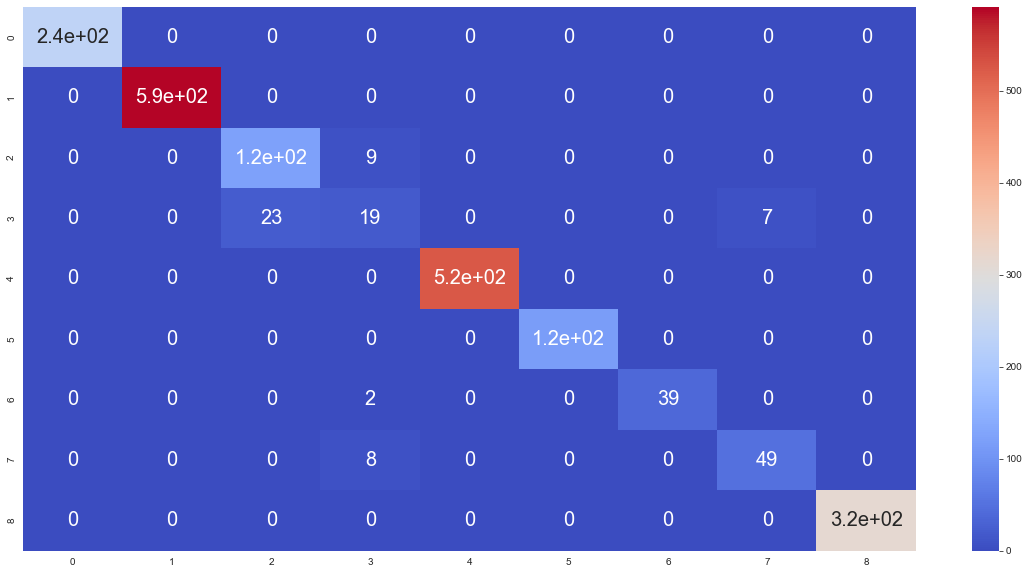



Training score : 1.0000


Test Score : 0.9954


K-fold accuracy : 0.9952


Standard Deviation of Accuracies in k-fold : 0.0013


F1 Score: 0.9751


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       1.00      1.00      1.00       235
      DegreeBranch       1.00      1.00      1.00       591
          EmpScore       0.84      0.93      0.88       132
        Ethinicity       0.50      0.39      0.44        49
            Gender       1.00      1.00      1.00       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       1.00      0.95      0.97        41
     MartialStatus       0.88      0.86      0.87        57
  YearsOfExperince       1.00      1.00      1.00       315

          accuracy                           0.98      2062
         macro avg       0.91      0.90      0.91      2062
      weighted avg       0.97      0.98      0.98      2062






Wall time: 25min 42s


In [71]:
%%time

xgb = metrics(['XGBClassifier', GridSearchCV(XGBClassifier(random_state = 42 , eval_metric='mlogloss') , param_grid = grid_xgb, cv = 5, verbose = 0 , scoring = roc_auc_ovr_scorer)] ,  X_train , y_train , X_test , y_test , params = True )

## Final Model Evauation

In [81]:
xgb = pre_final[0][1]
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,1.101949,-1.605738,-0.172712,1.060012,1.071380,0.522811,1.090304,0.858740,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1.101949,1.207093,1.218584,1.221419,0.977421,0.522811,-0.676103,1.039868,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.653976,1.207093,-1.419977,0.152846,0.107878,-0.349034,1.090304,-0.214165,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1.541023,0.626932,1.074553,-1.870790,-2.138867,1.235160,0.962490,-3.118296,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1.324453,-0.021633,0.104671,0.599814,0.880656,0.522811,-0.427032,-0.071754,1,0,...,0,1,0,0,0,1,0,1,0,0


In [83]:
xgb_preds = xgb.predict(test)

In [84]:
xgb_preds

array(['DegreeBranch', 'DegreeBranch', 'MartialStatus', ...,
       'DegreeBranch', 'CurrentCompanyType', 'LatestDegreeCGPA'],
      dtype=object)

In [85]:
final_1 = pd.DataFrame(xgb_preds , columns = ["Bias"])
final_1

,Bias
0,DegreeBranch
1,DegreeBranch
2,MartialStatus
3,CurrentCompanyType
4,Gender
...,...
8740,Gender
8741,HighestDegree
8742,DegreeBranch
8743,CurrentCompanyType


In [86]:
final_1.to_csv("Bias Preds 1.csv")

## Final predictions for submission

In [191]:
final.to_csv("AmazonHiring_2.csv" , index = False)

Didn't preformed gridsearchcv on all models due to lack of computation power